In [3]:
#imports
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow


Original image (pixels):(400,400)
Resized image (pixels):(100,100)


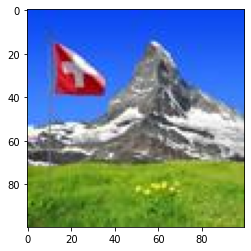

In [32]:
#function shows image
def show_img(img_path):
    #open image
    im = Image.open(img_path, 'r')
    imshow(np.asarray(im))

#function converts pixels to centimeters
def pix2cm(pixels):
    result_cm = pixels * 2.54 / 96
    return result_cm

#function converts centimeters to pixels
def cm2pix(cm):
    result_pix = cm * 96 / 2.54
    return result_pix

#give image dimensions in pixels
def im_pixdims(img_path):
    #open image - reading mode
    im = Image.open(img_path, 'r')

    #original image pixel dimensions
    W, H = im.size
    return W, H

#give image dimensions in centimeters
def im_cmdims(img_path):
    W, H = im_pixdims(img_path)
    W_cm, H_cm = pix2cm(W), pix2cm(H)
    return W_cm, H_cm

def im_resizer_pix(target_w_pix, target_h_pix, img_path):
    #open image
    im = Image.open(img_path, 'r')

    #image original dimensions
    W, H = im_pixdims(img_path)

    #PS: to maintain proportion, mandatory resizer_w = resizer_h
    resizer_w = target_w_pix / W
    resizer_h = target_h_pix / H

    #resizing possibilities:
    #w = target_w_pix 
    #h = H * resizer_w
    #OR
    #h = target_h_pix
    #w = W * resizer_h

    h = H * resizer_w
    w = W * resizer_h

    if( (w > target_w_pix) & (h < target_h_pix) ):
        w = target_w_pix
    else:
        h = target_h_pix
    
    w, h = int(w), int(h)
    
    print(f'Original image (pixels):({W},{H})')
    print(f'Resized image (pixels):({w},{h})')

    #resized image
    r_im = im.resize((w,h))

    im_name = img_path.split('.')[0]
    im_extension = img_path.split('.')[1]
    
    #new name = previous_wxh.ext
    r_im_name = f'{im_name}_{w}x{h}.{im_extension}'
    r_im.save(r_im_name)

    show_img(r_im_name)
    

im_resizer_pix(100,100,'swiss_view.jpg')
